In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
#Переформатирование movies.csv (id, дата выхода, название) для удобного чтения pd
with open('movie_titles.csv', 'r', encoding='latin1') as input_file, open('output.csv', 'w', encoding='utf-8', newline='') as output_file:
    for line in input_file:
        modified_line = line.replace(',', ';', 2)
        output_file.write(modified_line)

import os
os.replace('output.csv', 'movie_titles.csv')

In [ ]:
column_names = ['id', 'release_date', 'title']

# Read the CSV file with a different delimiter
movies = pd.read_csv('movie_titles.csv', names=column_names, encoding='latin1', sep=';')

# Display the DataFrame with the desired table format

movies = movies.dropna(inplace=False)
movies

,id,release_date,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
data = []
count = 0
max_lines = 1000000  # Максимальное количество строк для чтения

with open('combined_data_1.txt', 'r') as file:
    current_movie_id = None
    for line in file:
        line = line.strip()
        if line.endswith(':'):
            current_movie_id = line[:-1]
        else:
            customer_id, rating, date = line.split(',')
            data.append([int(current_movie_id), int(customer_id), int(rating), date])
            count += 1
            if count >= max_lines:
                break

ratings = pd.DataFrame(data, columns=['FilmID', 'CustomerID', 'Rating', 'Date'])

# Print the DataFrame
ratings


,FilmID,CustomerID,Rating,Date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
999995,225,1441086,2,2004-10-04
999996,225,2104133,5,2005-01-19
999997,225,442222,2,2005-01-19
999998,225,324510,1,2005-01-23


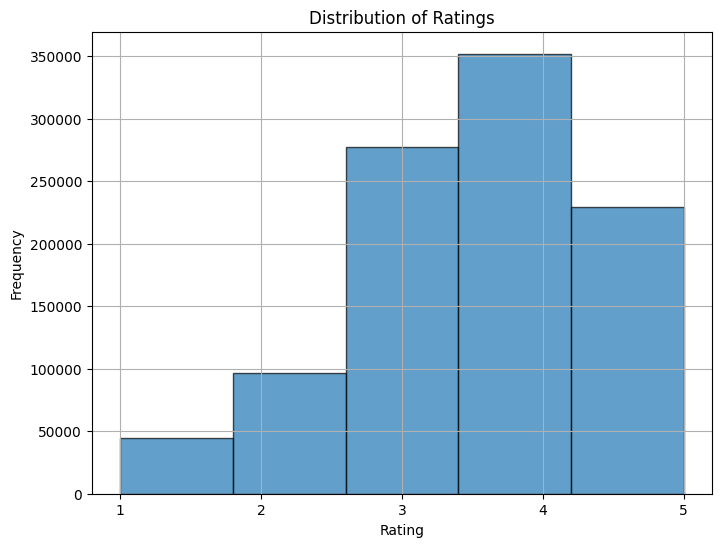

In [ ]:
# Распределение оценок
plt.figure(figsize=(8, 6))
plt.hist(ratings['Rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(1, 6))
plt.show()

In [ ]:
#Объединение названия фильмы-информации о нем
ratings_with_movie_titles = pd.merge(ratings, movies, left_on='FilmID', right_on='id')
ratings_with_movie_titles.drop(columns=['id'], inplace=True)

ratings_with_movie_titles

,FilmID,CustomerID,Rating,Date,release_date,title
0,1,1488844,3,2005-09-06,2003.0,Dinosaur Planet
1,1,822109,5,2005-05-13,2003.0,Dinosaur Planet
2,1,885013,4,2005-10-19,2003.0,Dinosaur Planet
3,1,30878,4,2005-12-26,2003.0,Dinosaur Planet
4,1,823519,3,2004-05-03,2003.0,Dinosaur Planet
...,...,...,...,...,...,...
999995,225,1441086,2,2004-10-04,2004.0,The Cookout
999996,225,2104133,5,2005-01-19,2004.0,The Cookout
999997,225,442222,2,2005-01-19,2004.0,The Cookout
999998,225,324510,1,2005-01-23,2004.0,The Cookout


In [ ]:
print(movies.columns)


Index(['id', 'release_date', 'title'], dtype='object')


In [ ]:
# Подсчет количества оценок для каждого фильма
movie_counts = ratings_with_movie_titles['title'].value_counts()

# Расчет средней оценки для каждого фильма
average_ratings = ratings_with_movie_titles.groupby('title')['Rating'].mean()

# Объединение результатов в один DataFrame
top_movies = pd.DataFrame({'Count': movie_counts, 'Average Rating': average_ratings})

# Выбор топ-10 фильмов с наибольшим количеством оценок
top_movies = top_movies.nlargest(10, 'Count')

print("Топ-10 самых популярных фильмов:")
top_movies


Топ-10 самых популярных фильмов:


,Count,Average Rating
title,,
Something's Gotta Give,118413,3.761842
X2: X-Men United,98720,3.932202
Reservoir Dogs,90450,4.003847
Taking Lives,81260,3.478932
Lilo and Stitch,39752,3.823254
The Game,38362,3.853032
The Deer Hunter,35509,3.893182
Duplex (Widescreen),30127,3.082882
Chappelle's Show: Season 1,24125,4.211192


In [ ]:
top_active_users = ratings_with_movie_titles \
    .groupby('CustomerID') \
    .agg(ratings_count=('Rating', 'count'), average_rating=('Rating', 'mean')) \
    .nlargest(10, 'ratings_count') \
    [['ratings_count', 'average_rating']]

#Самые активные пользователи по кол-ву поставленных оценок
top_active_users

,ratings_count,average_rating
CustomerID,,
305344,220,1.722727
387418,219,1.703196
2439493,210,1.152381
1664010,196,4.153061
2118461,183,4.000000
1461435,125,1.288000
1639792,116,1.224138
1932594,113,2.212389
1314869,109,2.954128


In [ ]:
#топ 10 самых высокооцененных фильмов

top_rated_movies = ratings_with_movie_titles \
    .groupby('title') \
    .agg(average_rating=('Rating', 'mean'), ratings_count=('Rating', 'count')) \
    .nlargest(10, 'average_rating')

top_rated_movies


,average_rating,ratings_count
title,,
Lord of the Rings: The Return of the King: Extended Edition: Bonus Material,4.552000,125
Elfen Lied,4.251880,266
Chappelle's Show: Season 1,4.211192,24125
Aqua Teen Hunger Force: Vol. 1,4.168650,6890
Star Trek: Deep Space Nine: Season 5,4.160759,4373
Invader Zim,4.142599,2216
GTO: Great Teacher Onizuka: Set 2,4.138021,384
Stevie Ray Vaughan and Double Trouble: Live at Montreux 1982 & 1985,4.097872,940
The Chorus,4.092230,9151


In [ ]:
mean_ratings_per_user = (
    ratings_with_movie_titles
    .groupby('CustomerID')
    .size()
    .mean()
)

median_ratings_per_user = (
    ratings_with_movie_titles
    .groupby('CustomerID')
    .size()
    .median()
)

print("Mean ratings per user:", mean_ratings_per_user)
print("Median ratings per user:", median_ratings_per_user)


Mean ratings per user: 3.524788072117164
Median ratings per user: 2.0


In [ ]:
median_ratings_per_movie = (
    ratings_with_movie_titles
    .groupby('FilmID')
    .size()
    .median()
)

mean_ratings_per_movie = (
    ratings_with_movie_titles
    .groupby('FilmID')
    .size()
    .mean()
)

print("Median ratings per movie:", median_ratings_per_movie)
print("Mean ratings per movie:", mean_ratings_per_movie)


Median ratings per movie: 574.0
Mean ratings per movie: 4978.662873399716


Уберем 70% фильмов с наименьшим кол-вом оценок и 40% пользователей, поставивших меньше всего оценок

In [ ]:
f = ['count','mean']

df_movie_summary = ratings_with_movie_titles.groupby('FilmID')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = ratings_with_movie_titles.groupby('CustomerID')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))
df_movie_summary


Movie minimum times of review: 1385.0
Customer minimum times of review: 4.0


,count,mean
FilmID,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
221,161,3.434783
222,99,2.606061
223,24125,4.211192


In [ ]:
print('Original Shape: {}'.format(ratings_with_movie_titles.shape))
ratings_with_movie_titles = ratings_with_movie_titles[~ratings_with_movie_titles['FilmID'].isin(drop_movie_list)]
ratings_with_movie_titles = ratings_with_movie_titles[~ratings_with_movie_titles['CustomerID'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(ratings_with_movie_titles.shape))
print(ratings_with_movie_titles.iloc[::5000000, :])

Original Shape: (1000000, 6)
After Trim Shape: (637105, 6)
     FilmID  CustomerID  Rating        Date  release_date      title
693       3      712664       5  2004-02-01        1997.0  Character


In [ ]:
ratings_matrix = ratings_with_movie_titles.pivot_table(index='CustomerID', columns='FilmID', values='Rating')
ratings_matrix

FilmID,1,2,3,4,5,6,7,8,9,10,...,216,217,218,219,220,221,222,223,224,225
CustomerID,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(ratings_matrix.shape)

(283705, 225)


In [ ]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162991 sha256=716454fa5feb558ed5ff101e589664f0688154818554782d98d3c0cd95c579ed
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import KNNBasic
from surprise import Dataset, Reader, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
sns.set_style("darkgrid")

In [ ]:
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(ratings_with_movie_titles[['CustomerID', 'FilmID', 'Rating']][:], reader)
#data.split(n_folds=3)

svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.96862425, 0.96250708, 0.96715179, 0.96771537, 0.9630483 ]),
 'test_mae': array([0.76224382, 0.75777867, 0.76065852, 0.76074637, 0.75819792]),
 'fit_time': (12.199584722518921,
  13.279648780822754,
  12.404082298278809,
  11.697772741317749,
  12.494913578033447),
 'test_time': (1.871769666671753,
  1.8879742622375488,
  2.169851303100586,
  1.8614537715911865,
  1.625495195388794)}

In [ ]:
df_1314869 = ratings_with_movie_titles[(ratings_with_movie_titles['CustomerID'] == 1314869) & (ratings_with_movie_titles['Rating'] == 5)]
df_1314869 = df_1314869.set_index('FilmID')
#df_785314 = df_785314.join(movies)['Name']
df_1314869

,CustomerID,Rating,Date,release_date,title
FilmID,,,,,
55,1314869,5,2004-08-24,1995.0,Jade
165,1314869,5,2004-04-27,1982.0,Richard Pryor: Live on the Sunset Strip
191,1314869,5,2004-04-16,2003.0,X2: X-Men United
197,1314869,5,2004-08-17,2004.0,Taking Lives


In [ ]:
user_1314869 = movies.copy()
user_1314869 = user_1314869.reset_index()
user_1314869 = user_1314869[~user_1314869['id'].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(ratings_with_movie_titles[['CustomerID', 'FilmID', 'Rating']], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

user_1314869['Estimate_Score'] = user_785314['id'].apply(lambda x: svd.predict(785314, x).est)

user_1314869 = user_1314869.drop('id', axis = 1)

user_1314869 = user_1314869.sort_values('Estimate_Score', ascending=False)
print(user_1314869.head(10))

     index  release_date                           title  Estimate_Score
56      56        1995.0                     Richard III        4.192616
174    174        1992.0                  Reservoir Dogs        3.993867
32      32        2000.0  Aqua Teen Hunger Force: Vol. 1        3.934276
222    222        2003.0      Chappelle's Show: Season 1        3.756814
179    179        2002.0                         Scratch        3.663266
198    198        1978.0                 The Deer Hunter        3.619939
151    151        1995.0               A Little Princess        3.585818
75      75        1952.0           I Love Lucy: Season 2        3.547852
51      51        2002.0         The Weather Underground        3.533883
170    170        1957.0                      Funny Face        3.454454


Корреляция Пирсона


In [ ]:
def recommend(movie_title, min_count):
    print("For movie ({})".format(movie_title))
    print("- Top 10 movies recommended based on Pearsons'R correlation - ")
    i = int(movies.index[movies['title'] == movie_title][0])
    target = ratings_matrix[i]
    similar_to_target = ratings_matrix.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['PearsonR'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('PearsonR', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(movies).join(df_movie_summary)[['PearsonR', 'title', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))


In [ ]:
recommend("X2: X-Men United", 0)

For movie (X2: X-Men United)
- Top 10 movies recommended based on Pearsons'R correlation - 
 PearsonR                                             title  count     mean
 0.880396                      Smokey and the Bandit Part 3 4690.0 4.008955
 0.878310                            Ruby's Bucket of Blood 1884.0 3.394374
 0.837869 At Home Among Strangers, A Stranger Among His Own 1002.0 3.661677
 0.749980                                    Chain of Fools 2724.0 2.906755
 0.742857                                   Bollywood Bound 1190.0 3.368908
 0.703989                           Airplane II: The Sequel 1714.0 2.767795
 0.700662                                    Justice League 1899.0 3.221169
 0.695151                    Aqua Teen Hunger Force: Vol. 1 1463.0 4.059467
 0.692219                 Vampire Effect (aka Twins Effect) 1628.0 3.367936
 0.686464                                             Congo 2427.0 4.040791


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


# iKNN

In [ ]:
similarity_matrix = cosine_similarity(ratings_matrix.T.fillna(0))
similarity_matrix


array([[1.        , 0.01493888, 0.00920994, ..., 0.02308313, 0.01720954,
        0.01382764],
       [0.01493888, 1.        , 0.00649565, ..., 0.01324753, 0.01013852,
        0.00810005],
       [0.00920994, 0.00649565, 1.        , ..., 0.02249369, 0.02733631,
        0.00579087],
       ...,
       [0.02308313, 0.01324753, 0.02249369, ..., 1.        , 0.0075399 ,
        0.07856416],
       [0.01720954, 0.01013852, 0.02733631, ..., 0.0075399 , 1.        ,
        0.00710516],
       [0.01382764, 0.00810005, 0.00579087, ..., 0.07856416, 0.00710516,
        1.        ]])

In [ ]:
knn_movies = {}
for i, movie_id in enumerate(ratings_matrix.columns):
    sim_scores = list(enumerate(similarity_matrix[i]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    knn_movies[movie_id] = [sim_movie for sim_movie, _ in sim_scores[1:6]]

knn_movies

{1: [80, 95, 220, 57, 76],
 2: [6, 173, 99, 81, 213],
 3: [96, 166, 144, 198, 155],
 4: [206, 138, 183, 213, 60],
 5: [90, 91, 68, 222, 132],
 6: [200, 51, 174, 179, 198],
 7: [65, 85, 146, 99, 133],
 8: [174, 29, 190, 198, 142],
 9: [40, 131, 133, 66, 23],
 10: [111, 10, 5, 200, 51],
 11: [200, 9, 70, 203, 51],
 12: [89, 116, 103, 49, 170],
 13: [204, 40, 8, 66, 192],
 14: [80, 118, 217, 219, 173],
 15: [217, 30, 60, 202, 146],
 16: [215, 57, 121, 76, 216],
 17: [196, 25, 107, 224, 117],
 18: [142, 174, 198, 82, 56],
 19: [62, 172, 49, 184, 176],
 20: [197, 62, 135, 99, 6],
 21: [171, 201, 218, 104, 176],
 22: [146, 74, 202, 119, 180],
 23: [26, 34, 27, 47, 75],
 24: [130, 131, 15, 124, 76],
 25: [223, 114, 116, 170, 219],
 26: [224, 107, 196, 16, 110],
 27: [22, 213, 102, 173, 75],
 28: [190, 29, 57, 147, 196],
 29: [201, 164, 224, 25, 82],
 30: [196, 190, 110, 174, 142],
 31: [217, 14, 60, 202, 40],
 32: [75, 57, 117, 29, 27],
 33: [222, 174, 186, 190, 67],
 34: [138, 213, 202, 40, 

In [ ]:
predicted_ratings = {}

# Iterate over the index of ratings_matrix, which contains the actual CustomerID values
for user_id in ratings_matrix.index:
    predicted_ratings[user_id] = {}
    for movie_id in ratings_matrix.columns:
        # Check if the rating for the movie is NaN (indicating the user hasn't rated it)
        if np.isnan(ratings_matrix.loc[user_id, movie_id]):
            similar_movies = knn_movies[movie_id]
            ratings = []
            # Iterate over similar movies and collect ratings given by the user
            for sim_movie in similar_movies:
                if not np.isnan(ratings_matrix.loc[user_id, sim_movie]):
                    ratings.append(ratings_matrix.loc[user_id, sim_movie])
            # If there are valid ratings from similar movies, calculate the mean
            if ratings:
                predicted_ratings[user_id][movie_id] = np.mean(ratings)
            else:
                # If no valid ratings are available, set the predicted rating as NaN
                predicted_ratings[user_id][movie_id] = np.nan


KeyError: 0

# Matrix Factorization

In [ ]:
!apt-get install -y libopenblas-dev pbzip2
!pip install -U tabulate==0.8.2
!pip install h2o4gpu
import h2o4gpu

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenblas-dev is already the newest version (0.3.20+ds-1).
The following NEW packages will be installed:
  pbzip2
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 40.0 kB of archives.
After this operation, 103 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pbzip2 amd64 1.1.13-1build1 [40.0 kB]
Fetched 40.0 kB in 1s (31.2 kB/s)
Selecting previously unselected package pbzip2.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../pbzip2_1.1.13-1build1_amd64.deb ...
Unpacking pbzip2 (1.1.13-1build1) ...
Setting up pbzip2 (1.1.13-1build1) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tabulate: filename=tabulate-0.8.2-py3-none-an

ModuleNotFoundError: No module named 'h2o4gpu'

In [ ]:
ratings_matrix.loc[6, 225]


nan

In [ ]:

from scipy.sparse import coo_matrix
from implicit.als import AlternatingLeastSquares

# Assuming you have a ratings DataFrame with columns ['CustomerID', 'FilmID', 'Rating']

# Create a sparse ratings matrix
ratings_matrix1 = coo_matrix((ratings['Rating'].astype(float),
                             (ratings['CustomerID'], ratings['FilmID'])))

# Initialize and train the ALS model
als_model = AlternatingLeastSquares(factors=100, regularization=0.01)
als_model.fit(ratings_matrix1)

# Function to predict ratings for a given user and movie
def predict_rating(user_id, movie_id):
    return als_model.predict(user_id, movie_id)

# Example usage
user_id = 123
movie_id = 456
predicted_rating = predict_rating(user_id, movie_id)
print("Predicted rating for user {} and movie {}: {:.2f}".format(user_id, movie_id, predicted_rating))


TypeError: list indices must be integers or slices, not str

Обработка данных, вариант 2


In [ ]:
df1 = pd.read_csv('/content/combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [ ]:
nan_ratings = df1[df1['Rating'].isna()]
nan_ratings

,Cust_Id,Rating
0,1:,NaN
548,2:,NaN
694,3:,NaN
2707,4:,NaN
2850,5:,NaN
...,...,...
24046714,4495:,NaN
24047329,4496:,NaN
24056849,4497:,NaN
24057564,4498:,NaN


In [ ]:
df_nan = pd.DataFrame(pd.isnull(df1.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

In [ ]:
#last_record = np.full((1,len(df1) - df_nan.iloc[-1, 0] - 1),movie_id)
last_record = np.full((1,len(df1) - df_nan.iloc[-1, 0] - 1),movie_id)

movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [ ]:
# remove those Movie ID rows
df1 = df1[pd.notnull(df1['Rating'])]

df1['Movie_Id'] = movie_np.astype(int)
df1['Cust_Id'] = df1['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df1.iloc[::5000000, :])
df1

-Dataset examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
#Убираем 70% фильмов и пользователй с наименьшим кол-вом оценок
f = ['count','mean']

df_movie_summary = df1.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df1.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0


In [ ]:
print('Original Shape: {}'.format(df1.shape))
df = df1[~df1['Movie_Id'].isin(drop_movie_list)]
df = df1[~df1['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::5000000, :])

Original Shape: (24053764, 3)
After Trim Shape: (18454563, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
6488806   2420090     4.0      1267
13030139    33607     5.0      2465
19489964  2419065     4.0      3713


In [ ]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)
